In [108]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import geopandas as gpd
import geoplot as gpl
import geoplot.crs as gcrs

In [109]:
rw_gis = gpd.read_file("Data/rw.json")
df = pd.read_csv("Data/train.csv")

rw_gis.head()


,source,id,name,geometry
0,https://simplemaps.com,RW02,Eastern,"POLYGON ((29.957 -2.327, 29.959 -2.3243, 29.96..."
1,https://simplemaps.com,RW05,Southern,"POLYGON ((30.018 -2.0721, 30.017 -2.0818, 30.0..."
2,https://simplemaps.com,RW04,Western,"POLYGON ((29.658 -1.7331, 29.66 -1.7367, 29.66..."
3,https://simplemaps.com,RW03,Northern,"POLYGON ((30.066 -1.3869, 30.07 -1.3891, 30.07..."
4,https://simplemaps.com,RW01,Kigali City,"POLYGON ((30.247 -1.8432, 30.248 -1.8485, 30.2..."


In [110]:
emission_avg = df.groupby(['latitude', 'longitude'])['emission'].mean().reset_index()

In [111]:
# Turn the geo information of emission dataset to geometry property of the GeoDataFrame.
from shapely.geometry import Point

geopoints = emission_avg.apply(
    lambda srs: Point(float(srs['longitude']), float(srs['latitude'])),
    axis='columns'
)

emission_avg_geocoded = gpd.GeoDataFrame(emission_avg, geometry=geopoints)
emission_avg_geocoded


,latitude,longitude,emission,geometry
0,-3.299,30.301,27.633301,POINT (30.301 -3.299)
1,-3.287,29.713,42.077684,POINT (29.713 -3.287)
2,-3.174,29.926,44.832340,POINT (29.926 -3.174)
3,-3.161,28.839,0.125809,POINT (28.839 -3.161)
4,-3.153,30.347,14.502592,POINT (30.347 -3.153)
...,...,...,...,...
492,-0.598,29.102,0.090357,POINT (29.102 -0.598)
493,-0.569,30.031,116.187763,POINT (30.031 -0.569)
494,-0.547,29.653,0.589954,POINT (29.653 -0.547)
495,-0.528,29.472,4.183500,POINT (29.472 -0.528)


### Sadly, I couldn't figure out why the boundary of the map didn't fit the point from train data. I can ensure that the gis data for the map is correct. The problem may be caused by the geo data in the train data
### But luckly, we can see some partterns for the geo distribution

<GeoAxes: >

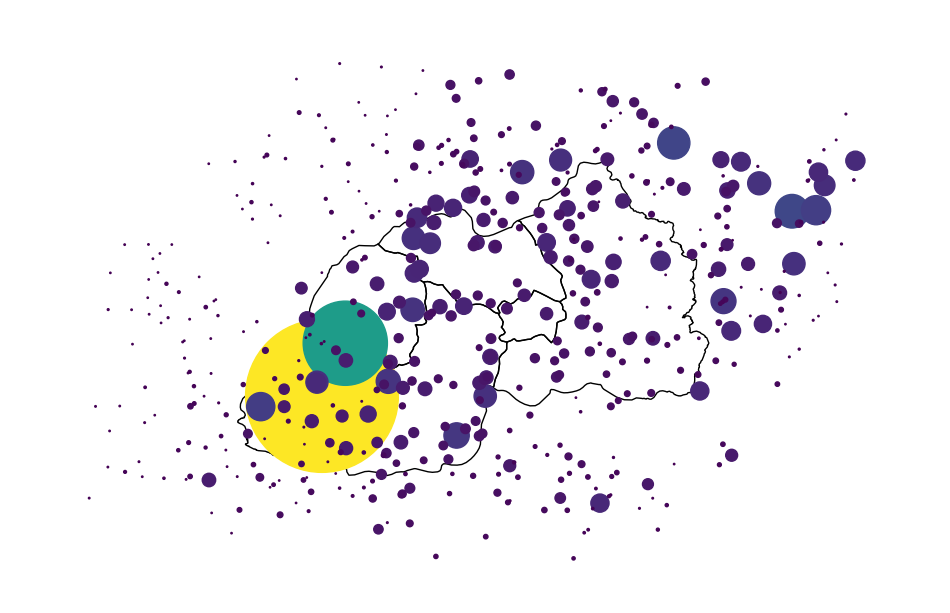

In [112]:
rw_map = gpl.polyplot(
    rw_gis,
    projection=gcrs.AlbersEqualArea(),
    linewidth=1,
    figsize=(12, 8))

gpl.pointplot(emission_avg_geocoded, 
              projection=gcrs.AlbersEqualArea(),
              hue='emission',scale='emission', limits=(1, 110),
              ax=rw_map)


<GeoAxes: xlabel='None', ylabel='None'>

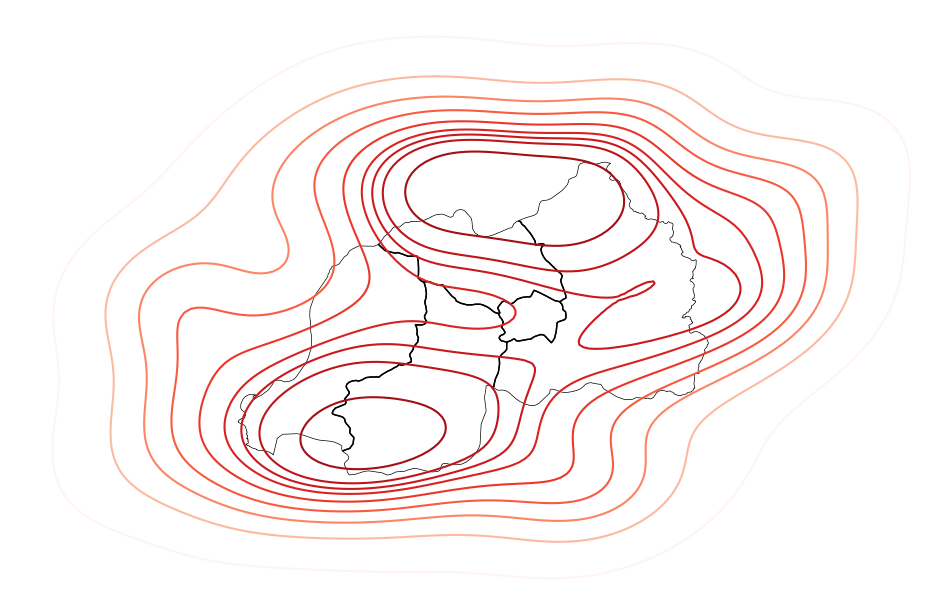

In [113]:
rw_map = gpl.polyplot(
    rw_gis,
    projection=gcrs.AlbersEqualArea(),
    linewidth=1,
    figsize=(12, 8))

gpl.kdeplot(emission_avg_geocoded, 
            projection=gcrs.AlbersEqualArea(),
            cmap='Reds', clip = rw_gis, thresh=0.05,
            ax=rw_map)